## Preparação do ambiente

Instalação das bibliotecas necessárias

In [1]:
pip install pandas seaborn matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Importação das bibliotecas

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Carregamento do arquivo em um DataFrame

In [3]:
df = pd.read_csv('diabetes_dataset.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
4,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0


In [4]:
count = df['Outcome'].value_counts()
count

Outcome
0    367
1    205
Name: count, dtype: int64

## Análise dos dados

Estatísticas da tabela

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,572.000000,567.000000,537.000000,345.000000,198.000000,561.000000,572.000000,572.000000,572.000000
mean,4.106643,121.647266,73.150838,29.356522,156.934343,32.327629,0.459121,34.043706,0.358392
std,3.446995,30.132084,12.347184,10.433503,119.066934,6.735437,0.336124,12.103893,0.479948
min,0.000000,44.000000,30.000000,7.000000,16.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,65.000000,22.000000,77.500000,27.500000,0.236000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,30.000000,129.500000,32.000000,0.344500,30.000000,0.000000
75%,6.000000,140.000000,80.000000,36.000000,185.000000,36.600000,0.605500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,744.000000,57.300000,2.329000,81.000000,1.000000


Valores nulos de cada coluna

In [6]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Visualização gráfica e geral dos dados

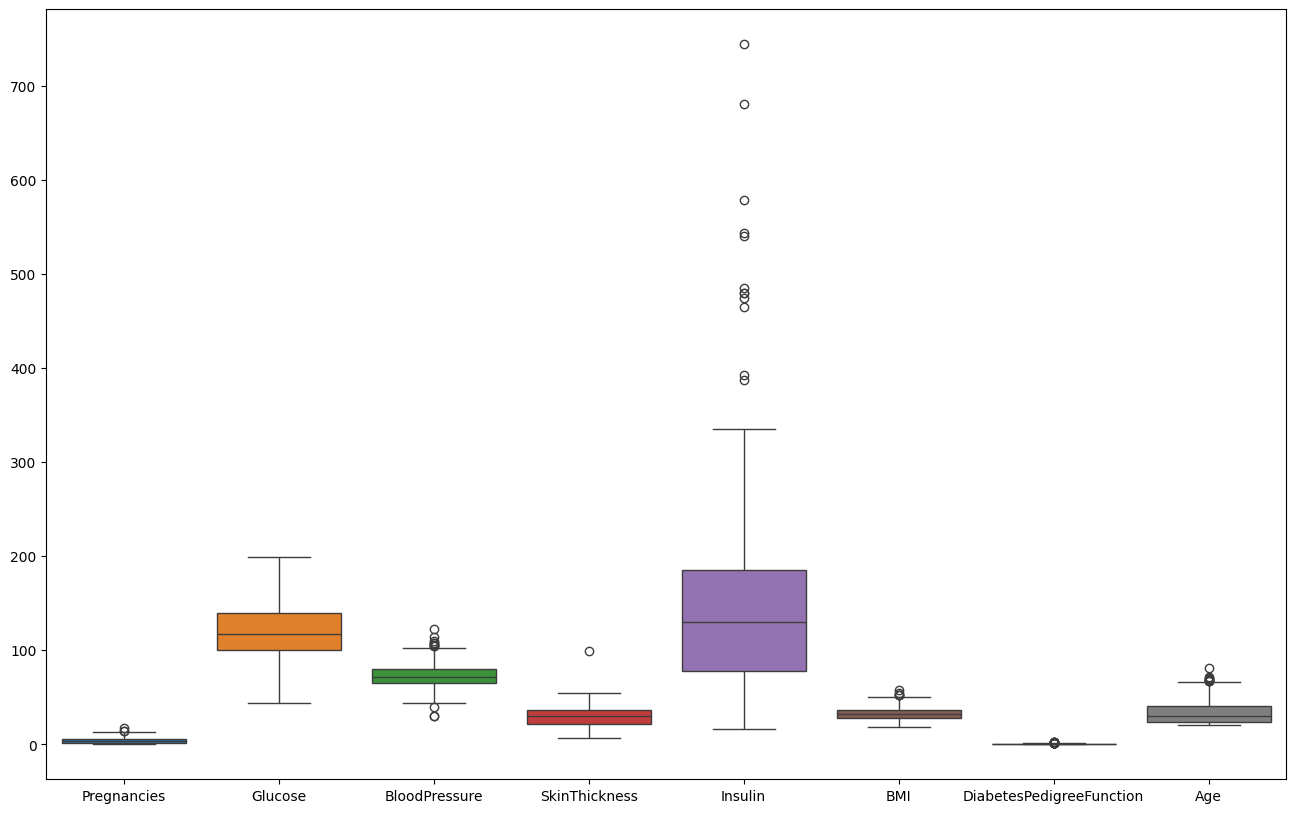

In [7]:
plt.figure(figsize= (16,10))
sns.boxplot(data= df.drop(columns=['Outcome']))
plt.savefig('boxplot.png')
plt.show()

## Pré-processamento

### Remoção de Outliers para Correlação

Remoção de outliers e valores nulos para cálculo da média

In [8]:
df_no_outliers = df.copy()
df_no_outliers = df_no_outliers[df_no_outliers['BloodPressure'] < 120]
df_no_outliers = df_no_outliers[df_no_outliers['BloodPressure'] > 40]

df_no_outliers = df_no_outliers[df_no_outliers['SkinThickness'] < 45]
df_no_outliers = df_no_outliers[df_no_outliers['SkinThickness'] > 15]
df_no_outliers = df_no_outliers[df_no_outliers['Insulin'] < 320]
df_no_outliers = df_no_outliers[df_no_outliers['Glucose'] < 200]

df_no_outliers = df_no_outliers[df_no_outliers['BMI'] < 50]



Visualização gráfica dos dados após remoção dos outliers e nulos

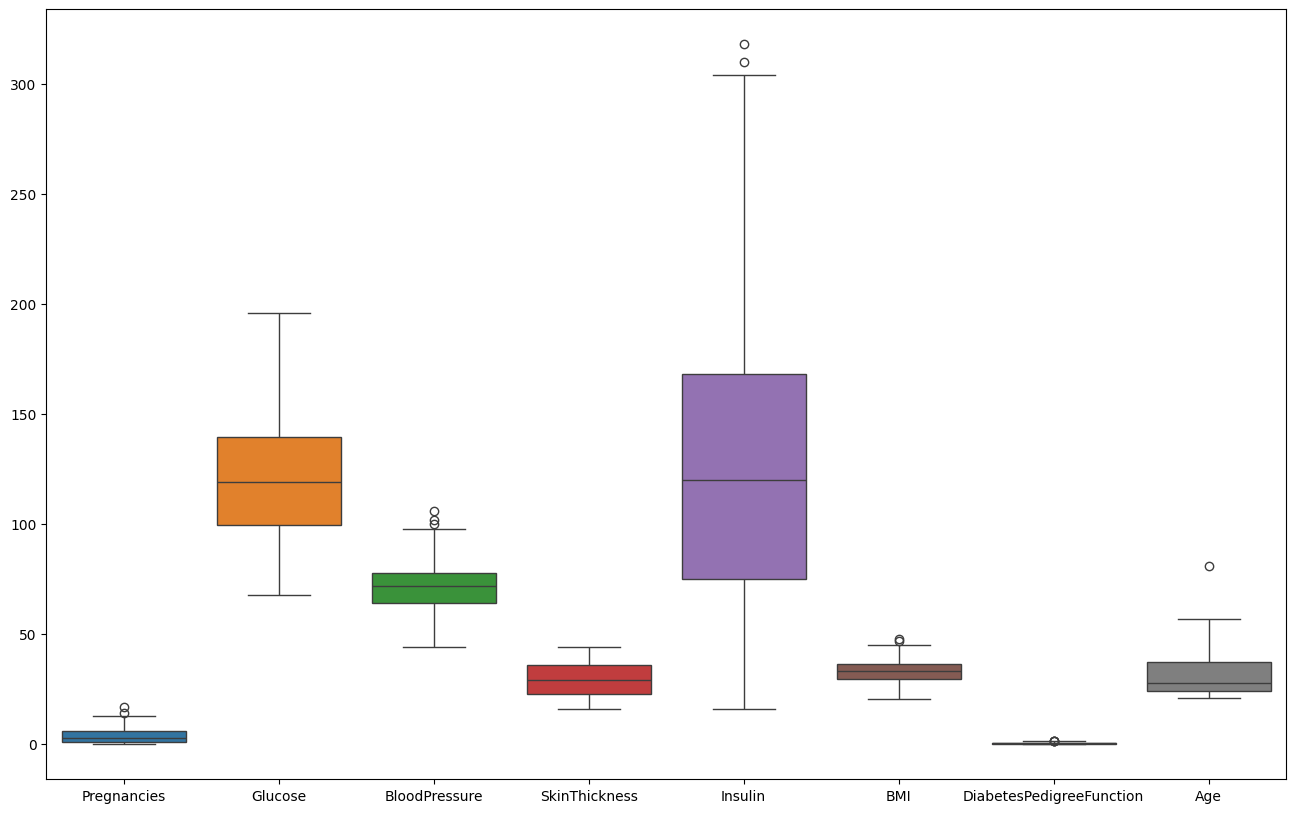

In [9]:
plt.figure(figsize= (16,10))
sns.boxplot(data= df_no_outliers.drop(columns=['Outcome']))
plt.savefig('boxplot.png')
plt.show()

Contagem de pacientes doentes e saudáveis e que possuem todos as colunas preenchidas

In [10]:
qtd_sick = df_no_outliers[df_no_outliers['Outcome'] == 1].shape[0]
qtd_healthy = df_no_outliers[df_no_outliers['Outcome'] == 0].shape[0]

print(f"Number of sick patients: {qtd_sick}")
print(f"Number of healthy patients: {qtd_healthy}")

Number of sick patients: 45
Number of healthy patients: 98


Conferindo se realmente removeu todos os nulos

In [11]:
df_no_outliers.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Estatísticas da tabela após remoção de nulos e outliers

In [12]:
df_no_outliers.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,3.797203,121.335664,71.251748,29.335664,129.398601,33.062937,0.500084,31.237762,0.314685
std,3.587065,28.714217,11.410687,7.847978,66.929450,5.501699,0.317053,10.090407,0.466023
min,0.000000,68.000000,44.000000,16.000000,16.000000,20.400000,0.085000,21.000000,0.000000
25%,1.000000,99.500000,64.000000,23.000000,75.000000,29.650000,0.260000,24.000000,0.000000
50%,3.000000,119.000000,72.000000,29.000000,120.000000,33.200000,0.423000,28.000000,0.000000
75%,6.000000,139.500000,78.000000,36.000000,168.000000,36.300000,0.685000,37.500000,1.000000
max,17.000000,196.000000,106.000000,44.000000,318.000000,47.900000,1.699000,81.000000,1.000000


Correlação entre as colunas

In [13]:
df_no_outliers.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.126948,0.208579,0.170792,0.008494,-0.046238,0.020561,0.715588,0.164827
Glucose,0.126948,1.000000,0.115138,0.130092,0.604131,0.099229,0.103385,0.199053,0.517267
BloodPressure,0.208579,0.115138,1.000000,0.179056,0.011560,0.227397,-0.052304,0.309880,0.104186
SkinThickness,0.170792,0.130092,0.179056,1.000000,0.129444,0.543972,-0.016625,0.139227,0.192349
Insulin,0.008494,0.604131,0.011560,0.129444,1.000000,0.249380,0.132493,0.007898,0.344556
BMI,-0.046238,0.099229,0.227397,0.543972,0.249380,1.000000,0.042631,-0.031592,0.158944
DiabetesPedigreeFunction,0.020561,0.103385,-0.052304,-0.016625,0.132493,0.042631,1.000000,0.060515,0.243564
Age,0.715588,0.199053,0.309880,0.139227,0.007898,-0.031592,0.060515,1.000000,0.181660
Outcome,0.164827,0.517267,0.104186,0.192349,0.344556,0.158944,0.243564,0.181660,1.000000


### Remoção de colunas não utilizadas

In [14]:
df.pop('Pregnancies')
df.pop('SkinThickness')
# df.pop('Insulin')
df.pop('DiabetesPedigreeFunction')
df.pop('Age')
df.pop('BloodPressure')
df.pop('BMI')

0      33.6
1      26.6
2      23.3
3      43.1
4      25.6
       ... 
567    22.5
568    36.8
569    26.2
570    30.1
571    30.4
Name: BMI, Length: 572, dtype: float64

### Limpeza dos outliers das colunas selecionadas

Conferindo quantos dados sobraram após a remoção de colunas

In [15]:
df.isnull().sum()

Glucose      5
Insulin    374
Outcome      0
dtype: int64

Remoção de pacientes que possuem duas ou mais informações faltantes

In [16]:
missing_data = df.isna().sum(axis=1)

df = df[missing_data < 2]

Conferindo quantos dados nulos restaram após a remoção

In [17]:
df.isnull().sum()

Glucose      1
Insulin    370
Outcome      0
dtype: int64

### Preenchimento da coluna Glucose

In [18]:
mean_glucose_sick = df_no_outliers[df_no_outliers['Outcome'] == 1]['Glucose'].mean()
mean_glucose_healthy = df_no_outliers[df_no_outliers['Outcome'] == 0]['Glucose'].mean()

print(f"mean glucose level for sick patients: {mean_glucose_sick}")
print(f"mean glucose level for healthy patients: {mean_glucose_healthy}")

# Replace missing values with the mean glucose level for the corresponding outcome
df.loc[(df['Outcome'] == 1) & (df['Glucose'].isnull()), 'Glucose'] = mean_glucose_sick
df.loc[(df['Outcome'] == 0) & (df['Glucose'].isnull()), 'Glucose'] = mean_glucose_healthy

mean glucose level for sick patients: 143.17777777777778
mean glucose level for healthy patients: 111.3061224489796


### Preenchimento da coluna Insulin

In [19]:

mean_insulin_sick = df_no_outliers[df_no_outliers['Outcome'] == 1]['Insulin'].mean()
mean_insulin_healthy = df_no_outliers[df_no_outliers['Outcome'] == 0]['Insulin'].mean()

# Drop null values from column Insulin
df = df.dropna(subset=['Insulin'])

print(f"Mean insulin level for sick patients: {mean_insulin_sick}")
print(f"Mean insulin level for healthy patients: {mean_insulin_healthy}")

# Replace missing values with the mean insulin level for the corresponding outcome
df.loc[(df['Outcome'] == 1) & (df['Insulin'].isnull()), 'Insulin'] = mean_insulin_sick
df.loc[(df['Outcome'] == 0) & (df['Insulin'].isnull()), 'Insulin'] = mean_insulin_healthy

df.head()

Mean insulin level for sick patients: 163.3111111111111
Mean insulin level for healthy patients: 113.8265306122449


,Glucose,Insulin,Outcome
3,137.0,168.0,1
6,197.0,543.0,1
12,118.0,230.0,1
14,103.0,83.0,0
15,126.0,235.0,0


Contagem de pacientes doentes e saundáveis no DataFrame original

In [20]:
qtd_sick = df[df['Outcome'] == 1].shape[0]
qtd_healthy = df[df['Outcome'] == 0].shape[0]

print(f"Number of sick patients: {qtd_sick}")
print(f"Number of healthy patients: {qtd_healthy}")

Number of sick patients: 67
Number of healthy patients: 131


Visualização gráfica dos dados a partir de um boxplot

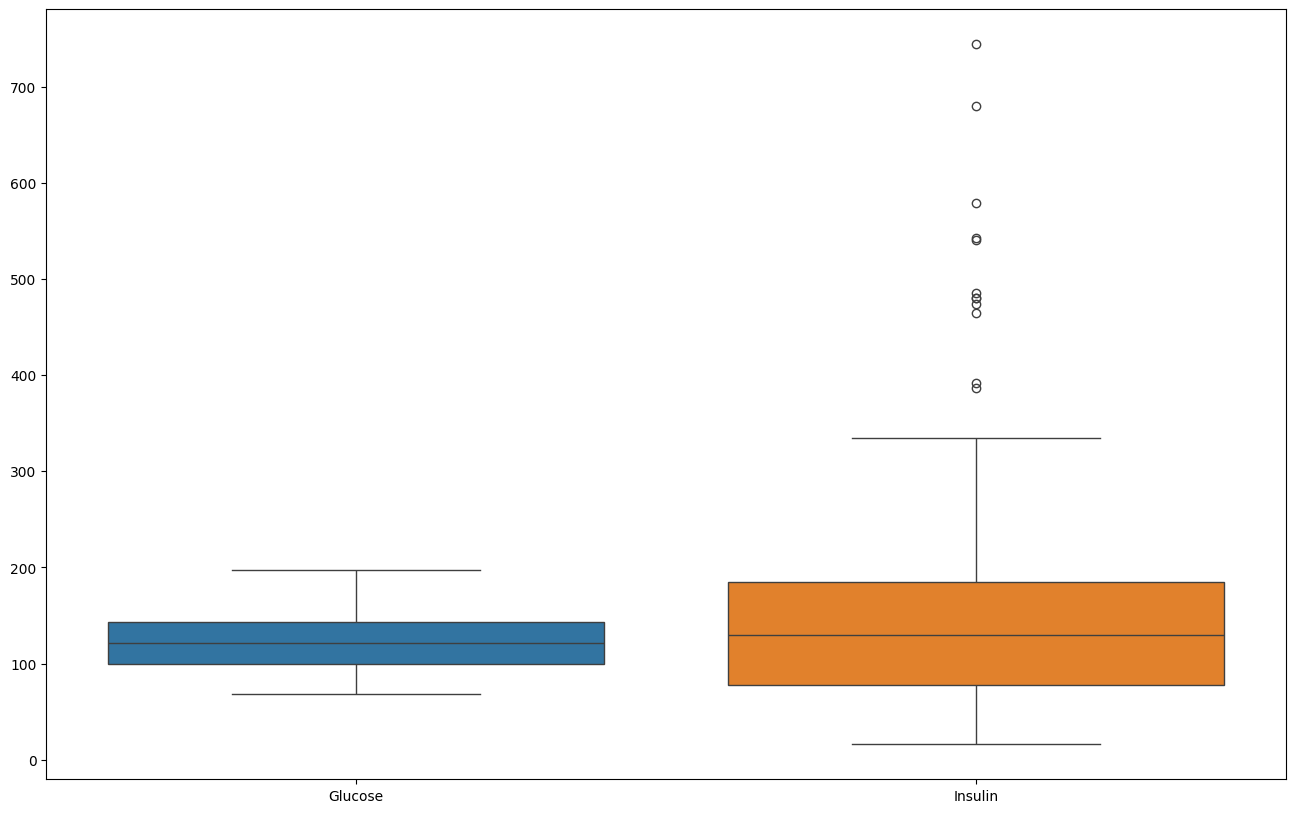

In [21]:
plt.figure(figsize= (16,10))
sns.boxplot(data= df.drop(columns=['Outcome']))
plt.savefig('boxplot.png')
plt.show()

Remoção de outliers

In [22]:
# df = df[df['BloodPressure'] < 105]
# df = df[df['BloodPressure'] > 40]

# df = df[df['SkinThickness'] < 45]
# df = df[df['SkinThickness'] > 15]
df = df[df['Insulin'] < 320]
# df = df[df['Glucose'] < 200]
# df = df[df['Age'] < 75]
# df = df[df['BMI'] < 50]

Visualização gráfica em boxplot após a remoção de outliers

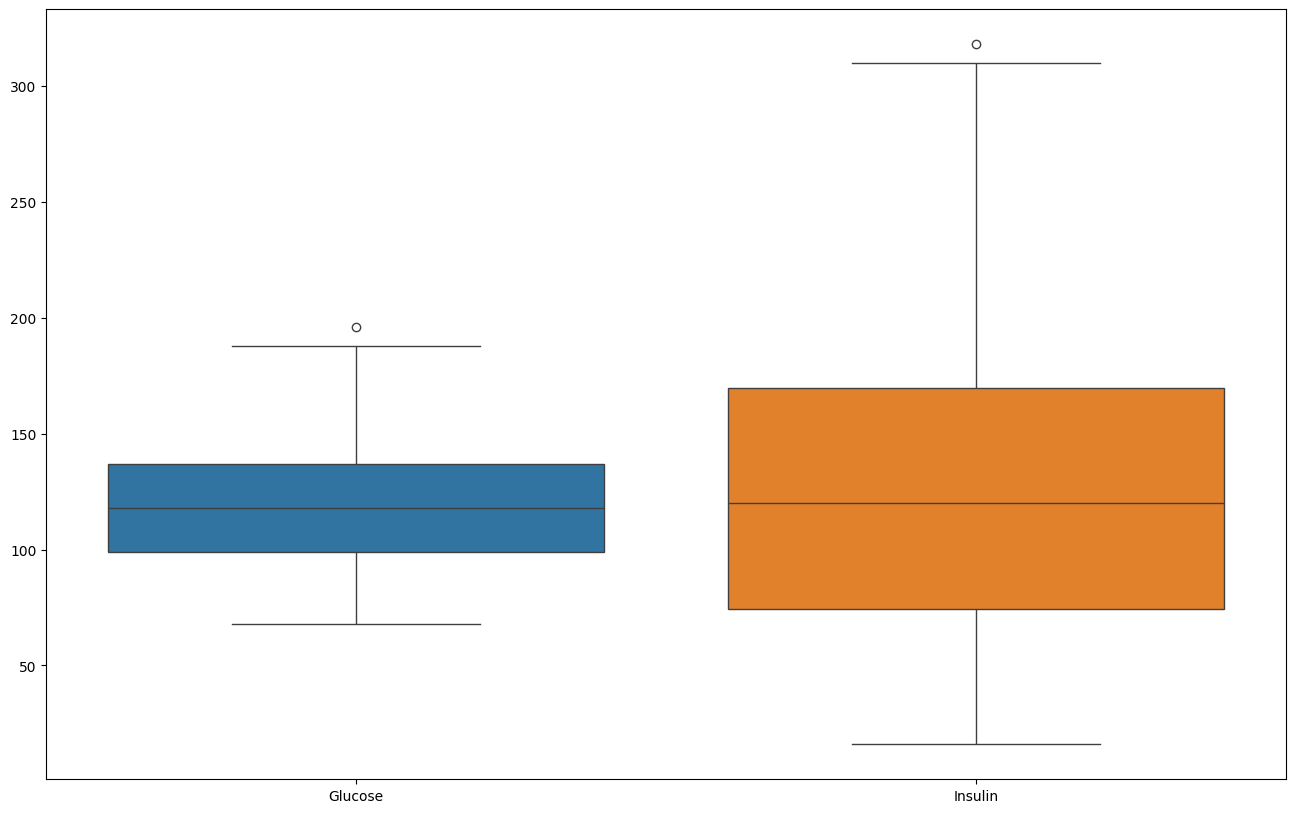

In [23]:
plt.figure(figsize= (16,10))
sns.boxplot(data= df.drop(columns=['Outcome']))
plt.savefig('boxplot.png')
plt.show()

## Resultado das etapas de pré-processamento

In [24]:
qtd_sick = df[df['Outcome'] == 1].shape[0]
qtd_healthy = df[df['Outcome'] == 0].shape[0]

print(f"Number of sick patients: {qtd_sick}")
print(f"Number of healthy patients: {qtd_healthy}")

Number of sick patients: 59
Number of healthy patients: 123


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 3 to 569
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Glucose  182 non-null    float64
 1   Insulin  182 non-null    float64
 2   Outcome  182 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 5.7 KB


## Normalização

In [26]:
df_normalized = df.reset_index().copy() 
  
# # apply normalization techniques 
# for column in df_normalized.columns: 
#     df_normalized[column] = (df_normalized[column] - df_normalized[column].min()) / (df_normalized[column].max() - df_normalized[column].min())     
  
df_normalized.tail()

,index,Glucose,Insulin,Outcome
177,553,153.0,140.0,0
178,554,100.0,105.0,0
179,558,121.0,74.0,0
180,565,88.0,16.0,0
181,569,121.0,112.0,0


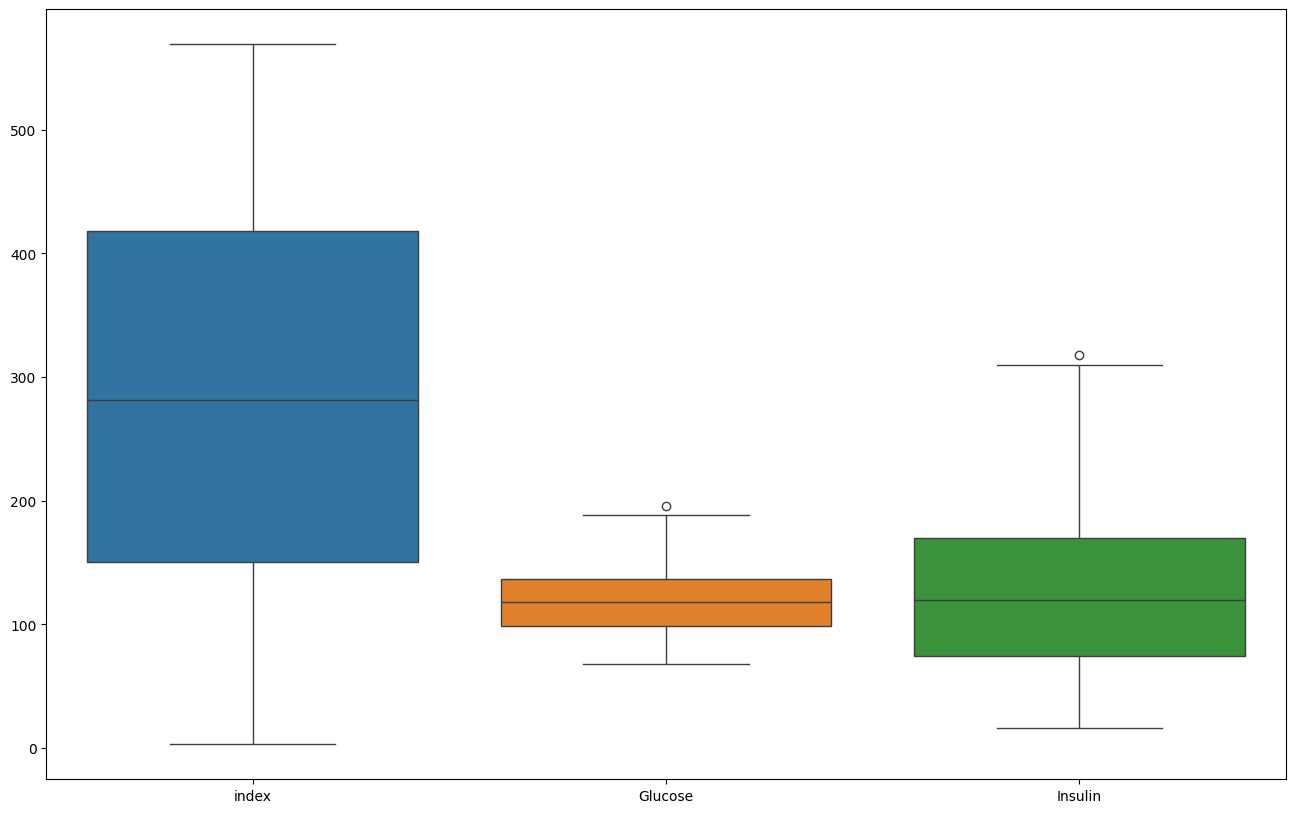

In [27]:
plt.figure(figsize= (16,10))
sns.boxplot(data= df_normalized.drop(columns=['Outcome']))
plt.savefig('boxplot.png')
plt.show()

Criando o dataset pré-processado

In [28]:
df_normalized.to_csv('diabetes_dataset_pre_processed.csv', index=False)

In [29]:
df_normalized.describe()

,index,Glucose,Insulin,Outcome
count,182.000000,182.000000,182.000000,182.000000
mean,284.307692,119.930253,129.164835,0.324176
std,158.022181,27.931121,67.384403,0.469357
min,3.000000,68.000000,16.000000,0.000000
25%,150.000000,99.000000,74.250000,0.000000
50%,281.000000,118.000000,120.000000,0.000000
75%,417.750000,137.000000,169.500000,1.000000
max,569.000000,196.000000,318.000000,1.000000
